# The autocorrelation function

The autocorrelation function quantifies the linear influence of the time lag between two observations of the process by a classical correlation calculation. The ACF for a time series 𝑦𝑡
is given by : 𝐶𝑜𝑟𝑟(𝑦𝑡,𝑦𝑡+1)

Python's **statsmodels.tsa.stattools.acf** option estimates the autocorrelation of time series data very quickly.

# Import module


In [4]:
from __future__ import unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import scipy

In [5]:
date_ini      = "2014-09-01"

date_fin      = "2017-03-31"


# Data files

In [6]:
data     = "QPThisto_J_isere@bvi_coche_ponserand_valid.txt"


d_ini = datetime.datetime.strptime(date_ini, '%Y-%m-%d')
d_fin = datetime.datetime.strptime(date_fin, '%Y-%m-%d')


Qobs   = list()
PS     = list()
TS     = list()
date_l = list()

#fmt   = '%d/%m/%Y' #'01/01/1948'

# observations file reading
QPT = open(data)

il=0
for iline in QPT:
    tmp_line = iline.split()
    il += 1
    if il==1: continue
    
    dt = datetime.datetime.strptime(tmp_line[0][1:11], '%d/%m/%Y')
   
    if (dt < d_ini): continue
    if (dt > d_fin): continue
    date_l.append(dt)
    Qobs.append(float(tmp_line[1]))
    PS.append(float(tmp_line[2]))
    TS.append(float(tmp_line[3]))
    
QPT.close()

# Precipitations case

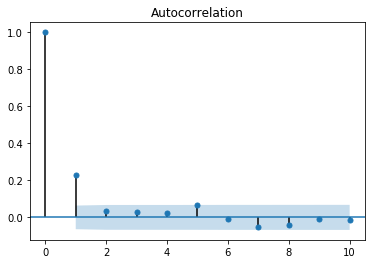

In [7]:
import statsmodels.tsa.stattools
from statsmodels.graphics.tsaplots import plot_acf
lags = len(PS)

plot_acf(PS, lags=10, alpha =0.05)
fig = plt.figure(1, figsize=(10, 6))


We need to approximate the PS function as a geometric sequence, because we want to approximate PS

with the AR model of order 1, according to the formula:
<p style='text-align:center'>
$PS_{t+1} = multiplicative factor * PS_{t} + Cst. $ <br>
    
- We are going to look for the multiplying factor by doing a linear regression.

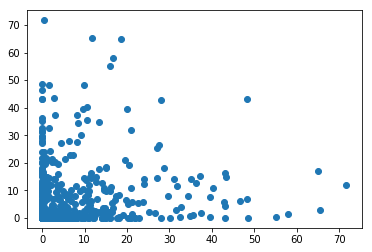

In [5]:
# scatter-plot de l'ordre 1 (lag=1)
plt.scatter( PS[:-1],PS[1:]  )
plt.show() 

- The regression with **scipy**

In [6]:
scipy.stats.linregress(PS[:-1],PS[1:])

LinregressResult(slope=0.22654059224194767, intercept=3.180568541055015, rvalue=0.22654059224194767, pvalue=1.986626686620226e-12, stderr=0.031768433417042316)

**The slope** (0.25) corresponds to our multiplying_factor (found by the method of least squares).

The formula of the model AR(1) : **$X_{t+1} = \phi * X_{t} + \epsilon$**
- by identification we can associate $\phi$ with this multiplicative factor, so for PS, $\phi$ = 0.25...

# Temperature case

[1.         0.93692584 0.85779829 0.813874   0.78556683 0.76181874
 0.74015839 0.72086614 0.70129337 0.68613688 0.67700036]


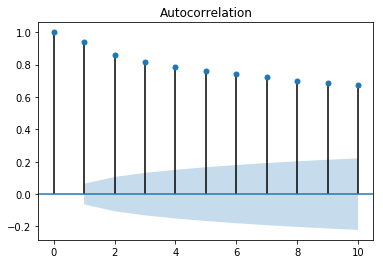

In [7]:
import statsmodels.tsa.stattools
from statsmodels.graphics.tsaplots import plot_acf
lags = len(TS)
#print lags

plot_acf(TS, lags=10, alpha =0.05)
r=statsmodels.tsa.stattools.acf(TS, unbiased=False,  qstat=False,  nlags=10, fft=False, alpha=None, missing='none')
print r
#x=np.mean(r)
#print x
fig = plt.figure(1, figsize=(10, 6))
#plt.plot(r, '-k', label='PS')
#plt.ylim(-1,1)

- To remove seasonality, we are going to smooth out the temperature data by calculating their average over 10 years.

In [8]:
date_ini      = "2007-01-01"

date_fin      = "2016-12-31"

first_year     = 2007

# fin de l'init

data     = "QPThisto_J_isere@bvi_coche_ponserand_valid.txt"


#####################################################################
#####################################################################

d_ini = datetime.datetime.strptime(date_ini, '%Y-%m-%d')
d_fin = datetime.datetime.strptime(date_fin, '%Y-%m-%d')
#d_ikn = datetime.datetime.strptime(d_deb_known, '%Y-%m-%d')


Qobs   = list()
PS     = list()
TS     = list()
date_l = list()

#fmt   = '%d/%m/%Y' #'01/01/1948'

# observations file reading
QPT = open(data)

il=0
for iline in QPT:
    tmp_line = iline.split()
    il += 1
    if il==1: continue
    
    dt = datetime.datetime.strptime(tmp_line[0][1:11], '%d/%m/%Y')
   
    if (dt < d_ini): continue
    if (dt > d_fin): continue
    date_l.append(dt)
    Qobs.append(float(tmp_line[1]))
    PS.append(float(tmp_line[2]))
    TS.append(float(tmp_line[3]))
    
QPT.close()


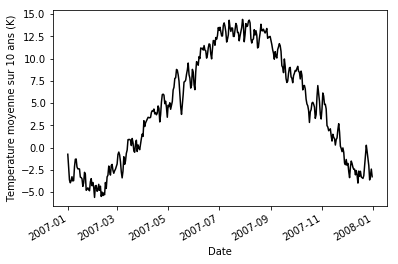

In [9]:
TS_smooth = list()

nb_TS = 0

# loop over the 10 years
for id in range(len(date_l)):

    
    YYYY = date_l[id].year
    MM   = date_l[id].month
    DD   = date_l[id].day
    
    
    if (YYYY > first_year):
       
        if (id - (YYYY-first_year)*nb_TS) < nb_TS:
            TS_smooth[id - (YYYY-first_year)*nb_TS] = TS_smooth[id - (YYYY-first_year)*nb_TS ] + TS[id]
    else: 
        TS_smooth.append(TS[id])
        nb_TS += 1

# nb annee total, 10 ans normalement 
Nb_year = (YYYY-first_year) + 1

# Divise la somme des TS sur le nb d'annees
TS_smooth = np.asarray(TS_smooth) / Nb_year

# plot 
plt.plot(date_l[0:nb_TS], TS_smooth, 'k')

plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Average temperature on "+str(Nb_year)+" ans (K)")
plt.show()

[1.         0.9888865  0.97607061 0.96474759 0.95578688 0.94865095
 0.94216998 0.93520035 0.92853206 0.92232559 0.91649366]


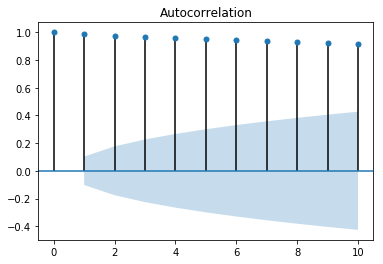

In [10]:
lags = len(TS_smooth)
#print lags

plot_acf(TS_smooth, lags=10, alpha =0.05)
r=statsmodels.tsa.stattools.acf(TS_smooth, unbiased=False,  qstat=False,  nlags=10, fft=False, alpha=None, missing='none')
print r
#x=np.mean(r)
#print x
fig = plt.figure(1, figsize=(10, 6))
#plt.plot(r, '-k', label='PS')
#plt.ylim(-1,1)

[1.         0.99669412 0.98845198 0.97678733 0.96281807 0.94734748
 0.93101112 0.91436795 0.89799282 0.88262322 0.86922357]


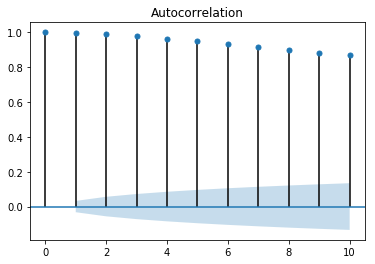

In [11]:
box_pts = 10

box = np.ones(box_pts)/float(box_pts)

TS_smooth = np.convolve(TS, box, mode='same')

lags = len(TS_smooth)
#print lags

plot_acf(TS_smooth, lags=10, alpha =0.05)
r=statsmodels.tsa.stattools.acf(TS_smooth, unbiased=False,  qstat=False,  nlags=10, fft=False, alpha=None, missing='none')
print r
#x=np.mean(r)
#print x
fig = plt.figure(1, figsize=(10, 6))